# Validation

In [1]:
%matplotlib inline

In [2]:
import psst

In [3]:
from psst.case import read_matpower
from psst.network import create_network
import pandas as pd

### Validation of case 1

In [4]:
case = read_matpower('./cases/case7.m')

In [5]:
case.load = pd.read_csv('./cases/case7.csv', index_col=0)

In [6]:
case.reserve_factor = 0.2

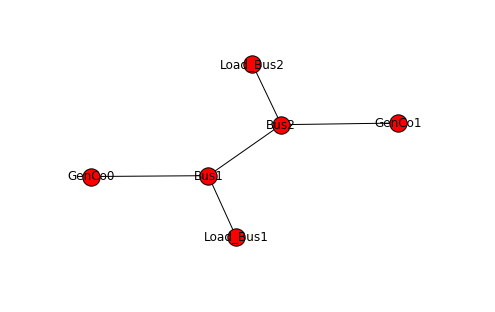

In [7]:
network = create_network(case, prog='neato')
network.draw()

In [8]:
case

<psst.case.PSSTCase(name=casematpower, Generators=2, Buses=2, Branches=1)>

In [9]:
case.bus

,TYPE,PD,QD,GS,BS,AREA,VM,VA,BASEKV,ZONE,VMAX,VMIN
Bus1,3,0,131.47,0,0,1,1,0,230,1,1.1,0.9
Bus2,2,100,0.00,0,0,1,1,0,230,1,1.1,0.9


In [10]:
case.branch

,F_BUS,T_BUS,BR_R,BR_X,BR_B,RATE_A,RATE_B,RATE_C,TAP,SHIFT,BR_STATUS,ANGMIN,ANGMAX
0,Bus1,Bus2,0.00281,0.0281,0.00712,800,800,800,0,0,1,-360,360


In [11]:
case.gen.loc['GenCo1', 'RAMP_10'] = 50
case.gen.loc['GenCo1', 'STARTUP_RAMP'] = 25

In [12]:
case.gen

,GEN_BUS,PG,QG,QMAX,QMIN,VG,MBASE,GEN_STATUS,PMAX,PMIN,PC1,PC2,QC1MIN,QC1MAX,QC2MIN,QC2MAX,RAMP_AGC,RAMP_10,RAMP_30,RAMP_Q,APF,STARTUP_RAMP,SHUTDOWN_RAMP,MINIMUM_UP_TIME,MINIMUM_DOWN_TIME
GenCo0,Bus1,200,0,30,-30,1,100,1,200,0,0,0,0,0,0,0,0,200,0,0,0,200,200,0,0
GenCo1,Bus2,500,0,30,-30,1,100,1,500,0,0,0,0,0,0,0,0,50,0,0,0,25,500,0,0


In [13]:
case.gencost.loc['GenCo1', 'STARTUP'] = 0
case.gencost.loc['GenCo1', 'SHUTDOWN'] = 0

In [14]:
case.gencost

,MODEL,STARTUP,SHUTDOWN,NCOST,COST_1,COST_0
GenCo0,1,0,0,2,10,0
GenCo1,1,0,0,2,14,2000


In [15]:
import matplotlib.pyplot as plt

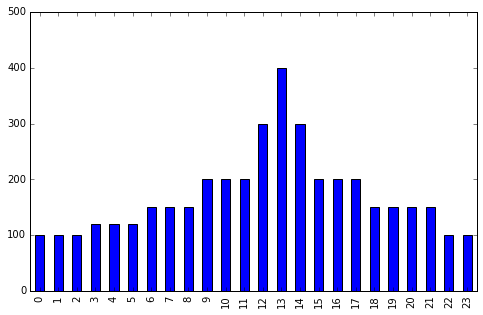

In [16]:
fig, axs = plt.subplots(1, 1, figsize=(8, 5))
ax = axs
case.load['Bus2'].plot.bar(ax=ax)
ax.set_ylim(0, 500);

In [17]:
from psst.model import build_model

In [18]:
model = build_model(case)

In [19]:
model

<psst.model.PSSTModel(status=None)>

In [20]:
model.solve(solver='cbc', verbose=True)

Welcome to the CBC MILP Solver 
Version: 2.9.6 
Build Date: May 27 2016 

command line - /usr/local/bin/cbc -mipgap 0.01 -printingOptions all -import /var/folders/wk/lcf0vgd90bx0vq1873tn04knk_djr3/T/tmpMOte8o.pyomo.lp -import -stat=1 -solve -solu /var/folders/wk/lcf0vgd90bx0vq1873tn04knk_djr3/T/tmpMOte8o.pyomo.soln (default strategy 1)
No match for mipgap - ? for list of commands
No match for 0.01 - ? for list of commands
Option for printingOptions changed from normal to all
Current default (if $ as parameter) for import is /var/folders/wk/lcf0vgd90bx0vq1873tn04knk_djr3/T/tmpMOte8o.pyomo.lp
Presolve 261 (-638) rows, 336 (-417) columns and 900 (-1411) elements
Statistics for presolved model
Original problem has 48 integers (48 of which binary)
Presolved problem has 24 integers (24 of which binary)
==== 120 zero objective 4 different
120 variables have objective of 0
48 variables have objective of 1
24 variables have objective of 2000
144 variables have objective of 1e+06
==== absolute o

### Input data

In [21]:
import pandas as pd

In [22]:
pd.DataFrame(case.gen['PMAX'])

,PMAX
GenCo0,200
GenCo1,500


In [23]:
case.load

,Bus1,Bus2
0,0.0,100.0
1,0.0,100.0
2,0.0,100.0
3,0.0,120.0
4,0.0,120.0
5,0.0,120.0
6,0.0,150.0
7,0.0,150.0
8,0.0,150.0
9,0.0,200.0


### Model Results

In [24]:
model.results.unit_commitment

,GenCo0,GenCo1
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
5,1,0
6,1,0
7,1,1
8,1,1
9,1,1


In [25]:
model.results.power_generated

,GenCo0,GenCo1
0,100,0
1,100,0
2,100,0
3,120,0
4,120,0
5,120,0
6,150,0
7,150,0
8,120,30
9,120,80


In [26]:
model.results.commitment_cost

0

In [27]:
model.results.production_cost

45700

In [28]:
model.results.noload_cost

22000.0

In [29]:
model.results.line_power

,0
0,100
1,100
2,100
3,120
4,120
5,120
6,150
7,150
8,120
9,120


In [30]:
from psst.plot import line_power, stacked_power_generation

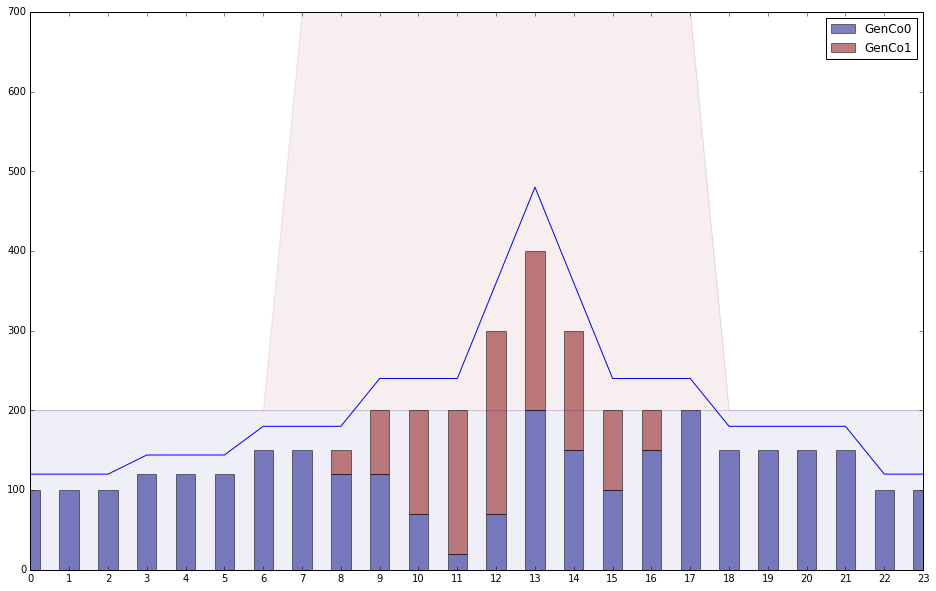

In [31]:
ax = stacked_power_generation(model.results, legend=True)

(model.results.power_generated.sum(axis=1) + model.results.regulating_reserve_up_available.sum(axis=1)).plot(ax=ax)